In [2]:
import Pkg; Pkg.add(Pkg.PackageSpec(url="https://github.com/JuliaComputing/JuliaAcademyData.jl"))
using JuliaAcademyData; activate("Foundations of machine learning")

   Updating git-repo `https://github.com/JuliaComputing/JuliaAcademyData.jl`


   Updating registry at `~/.juliapro/JuliaPro_v1.4.1-1/registries/JuliaPro`
  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.1-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.1-1/environments/v1.4/Manifest.toml`
 [no changes]
 Activating environment at `~/.juliapro/JuliaPro_v1.4.1-1/packages/JuliaAcademyData/1to3l/courses/Foundations of machine learning/Project.toml`


# Representing data in a computer

The core of data science and machine learning is **data**: we are interested in extracting knowledge from data.

But how exactly do computers represent data? Let's find out exactly what an "artificial intelligence" has at its disposal to learn from.

## Data is represented as arrays

Let's take a look at some fruit. Using the `Images.jl` library, we can load in some images:

In [3]:
using Images

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


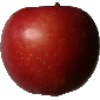

In [4]:
apple = load(datapath("data/10_100.jpg"))

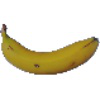

In [5]:
banana = load(datapath("data/104_100.jpg"))

Here we have images of apples and bananas. We would eventually like to build a program that can automatically distinguish between the two. However, the computer doesn't "see" an apple or a banana; instead, it just sees numbers.

An image is encoded in something called an **array**, which is like a container that has boxes or slots for individual pieces of data:

An array is a bunch of numbers in connected boxes; the figure above shows a 1-dimensional array. Our images are instead 2-dimensional arrays, or matrices, of numbers, arranged something like this:

<img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Foundations%20of%20machine%20learning/data/array2d.png" alt="attachment:array2d.png" width="500"/>

For example, `apple` is an image, consisting of a 100x100 array of numbers:

In [6]:
typeof(apple)

Array{RGB{Normed{UInt8,8}},2}

In [7]:
size(apple)

(100, 100)

In [8]:
a = [ 1 2 3;4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [9]:
typeof(a)

Array{Int64,2}

In [10]:
size(a)

(2, 3)

We can grab the datum stored in the box at row `i` and column `j` by *indexing* using square brackets: `[i, j]`. For example, let's get the pixel (piece of the image) in box $(40, 60)$, i.e. in the 40th row and 60th column of the image:

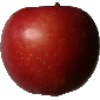

In [11]:
apple

In [12]:
dump(apple[40, 60])

RGB{Normed{UInt8,8}}
  r: Normed{UInt8,8}
    i: UInt8 0x85
  g: Normed{UInt8,8}
    i: UInt8 0x19
  b: Normed{UInt8,8}
    i: UInt8 0x0f


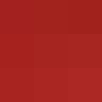

In [13]:
apple[18:20,29:31]

We see that Julia displays a coloured box! Julia, via the `Colors.jl` package, is clever enough to display colours in a way that is useful to us humans!

So, in fact, an image is a 2D array, in which each element of the array is an object (a collection of numbers) describing a coloured pixel.

## Colors as numbers

How, then, are these colors actually stored? Computers store colors in RGB format, that is they store a value between 0 and 1 for each of three "channels": red, green, and blue. Here, 0 means none of that color and 1 means the brightest form of that color. The overall color is a combination of those three colors.

For example, we can pull out the `red` value using the function `red` applied to the color. Since internally the actual value is stored in a special format, we choose to convert it to a standard floating-point number using the `Float64` function:

In [14]:
Float64(red(apple[40, 60]))

0.5215686274509804

In [15]:
using Statistics

In [16]:
[ mean(float.(c.(img))) for c = [red,green,blue], img = [apple,banana] ]

3×2 Array{Float32,2}:
 0.570278  0.903998
 0.338118  0.880692
 0.322406  0.799643

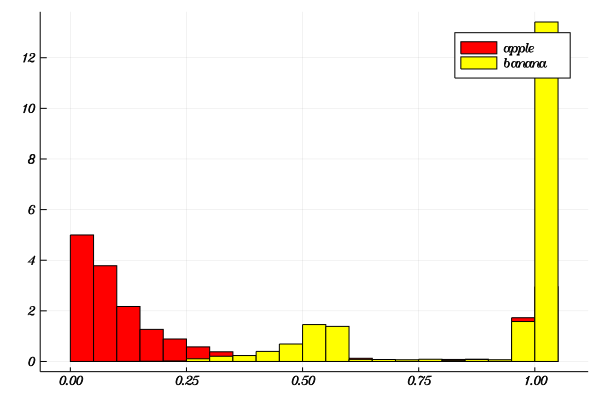

In [17]:
using Plots
histogram(float.(green.(apple[:])),color="red",label="apple", normalize=true, nbins=25)
histogram!(float.(green.(banana[:])),color="yellow",label="banana",normalize=true, nbins=25)

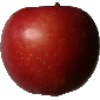

In [18]:
apple

In [19]:
float(red(banana[50,20]))

0.61960787f0

In [20]:
banana[50,20]

In [21]:
pixel = apple[40, 60]

red_value   = Float64( red(pixel) )
green_value = Float64( green(pixel) )
blue_value  = Float64( blue(pixel) )

print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.5215686274509804, 0.09803921568627451, 0.058823529411764705)

Since the red value is high while the others are low, this means that at pixel `(40, 60)`, the picture of the apple is very red. If we do the same at one of the corners of the picture, we get the following:

In [21]:
pixel = apple[1, 1]

red_value   = Float64( red(pixel) )
green_value = Float64( green(pixel) )
blue_value  = Float64( blue(pixel) )

print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.996078431372549, 1.0, 0.984313725490196)

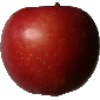

In [22]:
apple

We see that every color is bright, which corresponds to white.

## Working on an image as a whole

In Julia, to apply a function to the whole of an array, we place a `.` between the function name and the left parenthesis (`(`), so the following gives us the `red` value of every pixel in the image:

In [22]:
redpartofapple = Float64.(red.(apple))
mean(redpartofapple)

0.5702784313725491

In [23]:
using Plots

In [24]:
gr()

Plots.GRBackend()

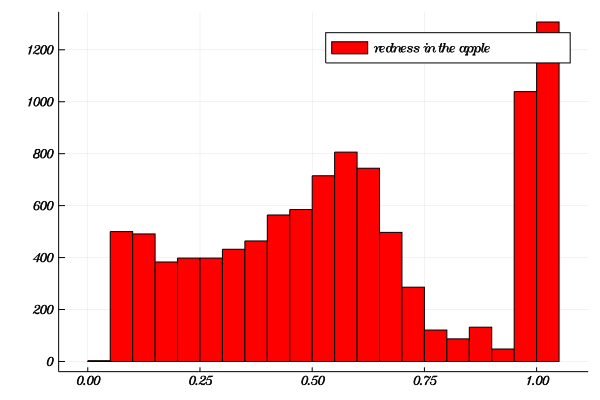

In [25]:
histogram(redpartofapple[:],color=:red,label="redness in the apple")

Note that we get a 2D array (matrix) back.

Julia's [mathematical standard library](https://docs.julialang.org/en/stable/stdlib/math/#Mathematics-1) has many mathematical functions built in. One of them is the `mean` function, which computes the average value. If we apply this to our apple:

In [26]:
mean(Float64.(red.(apple)))

0.5702784313725491

we see that the value indicates that the average amount of red in the image is a value between the amount of red in the apple and the amount of red in the white background.

*Somehow we need to teach a computer to use this information about a picture to recognize that there's an apple there!*

## A quick riddle

Here's a quick riddle. Let's check the average value of red in the image of the banana.

In [27]:
mean(Float64.(red.(banana)))

0.9039976470588237

Oh no, that's more red than our apple? This isn't a mistake and is actually true! Before you move onto the next exercise, examine the images of the apple and the banana very carefully and see if you can explain why this is expected.

#### Exercise 1

What is the average value of blue in the banana?

(To open a new box use <ESC>+b (b is for "below", what do you think a does?))

In [28]:
mean(Float64.(blue.(banana)))

0.7996431372549019

#### Solution

We can calculate the average value of blue in the banana via

In [29]:
mean(Float64.(blue.(banana)))

0.7996431372549019

The result is approximately `0.8`.

#### Exercise 2

Does the banana have more blue or more green?

#### Solution

The average value of green in the banana is

In [30]:
mean(Float64.(green.(banana)))

0.8806921568627452

which gives approximately `0.88`. The banana has more green on average.

# Modeling data 1

Machine learning and data science is about modeling data. **Modeling** is the representation of an idea with some parameters and  a mathematical representation which we will encode in software. All machine learning methods are about training a computer to fit a model to some data. Even the fanciest neural networks are simply choices for models. In this notebook, we will begin to start building our first computational model of data.

## Modeling data is hard!

Let's pick up where we left off in notebook 1 with fruit. We were left with a riddle: when we load images of apples and bananas,

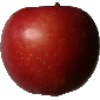

In [32]:
# using Pkg; Pkg.add("Images")
using Images, Statistics

apple = load(datapath("data/10_100.jpg"))

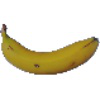

In [33]:
banana = load(datapath("data/104_100.jpg"))

and then compare their average value for the color red, we end up with something that is perhaps surprising:

In [34]:
apple_red_amount = mean(Float64.(red.(apple)))
banana_red_amount = mean(Float64.(red.(banana)));

"The average value of red in the apple is $apple_red_amount, " *
"while the average value of red in the banana is $banana_red_amount."

"The average value of red in the apple is 0.5702784313725491, while the average value of red in the banana is 0.9039976470588237."

We see that the banana's mean red value is higher than the apple's, even though the apple looks much redder. Can you guess why?

There are actually two reasons. One of the reasons is the background: the image of the banana has a lot more white background than the apple, and that white background has a red value of 1! In our minds we ignore the background and say "the banana is bright yellow, the apple is dark red", but a computer just has a bundle of numbers and does not know where it should be looking.

The other issue is that "bright yellow" isn't a color that exists in a computer. The computer has three colors: red, green, and blue. "Bright yellow" in a computer is a mixture of red and green, and it just so happens that to get this color yellow, it needs more red than the apple!

In [35]:
"The amount of red in the apple at (60, 60) is $(Float64(red(apple[60, 60]))), " *
"while the amount of red in the banana at (60, 60) is $(Float64(red(banana[60, 60])))."

"The amount of red in the apple at (60, 60) is 0.4470588235294118, while the amount of red in the banana at (60, 60) is 0.6666666666666666."

In [36]:
apple[60,60]

In [37]:
banana[60,60]

This is a clear example that modeling data is hard!

### A note on string interpolation

In the last two input cells, we *interpolated a string*. This means that when we write the string using quotation marks (`"  "`), we insert a placeholder for some **value** we want the string to include. When the string is evaluated, the value we want the string to include replaces the placeholder. For example, in the following string,

```julia
mystring = "The average value of red in the apple is $apple_red_amount"
```

`$apple_red_amount` is a placeholder for the value stored in the variable `apple_red_amount`. Julia knows that we want to use the value bound to the variable `apple_red_amount` and *not* the word "apple_red_amount" because of the dollar sign, `$`, that comes before `apple_red_amount`.

#### Exercise 1

Execute the following code to see what the dollar sign does:

```julia
mypi = 3.14159
println("I have a variable called mypi that has a value of $mypi.")
```

#### Solution

In [38]:
mypi = 3.14159
println("I have a variable called mypi that has a value of $mypi.")

I have a variable called mypi that has a value of 3.14159.


#### Exercise 2

Alter and execute the code that creates `mystring` below

```julia
apple_blue_amount = mean(Float64.(blue.(apple)))
mystring = "The average amount of blue in the apple is apple_blue_amount"
```

so that `println(mystring)` prints a string that reports the mean value of blue coloration in our image of an apple.

#### Solution

Add a `$` in front of `apple_blue_amount`:

In [39]:
apple_blue_amount = mean(Float64.(blue.(apple)))
mystring = "The average amount of blue in the apple is $apple_blue_amount."

"The average amount of blue in the apple is 0.32240588235294115."

## Take some time to think about the data

Apples and bananas are very different, but how could we use the array of RGB values (which is how the images are represented in the computer, as we saw in notebook 1) to tell the difference between the two? Here are some quick ideas:

- We could use the shape of the object in the image. But how can we encode ideas about shape from an array?
- We could use the size of the object in the image. But how do we calculate that size?
- We could use another color, or combinations of colors, from the image. Which colors?

Let's go with the last route. The banana is yellow, which is a combination of red and green, while the apple is red. This means that the color that clearly differentiates between the two is not red, but green!

In [40]:
apple_green_amount = mean(Float64.(green.(apple)))
banana_green_amount = mean(Float64.(green.(banana)));

"The average value of green in the apple is $apple_green_amount, " *
"while the average value of green in the banana is $banana_green_amount."

"The average value of green in the apple is 0.33811764705882347, while the average value of green in the banana is 0.8806921568627452."

The processes that we just went through are assigned fancy names: feature selection and data munging.

**Feature selection** is the process of subsetting the data to a more relevant and informative set. We took the full image data and decided to select out the green channel.

**Data munging** is transforming the data into a format more suitable for modeling. Here, instead of keeping the full green channel, we transformed it down to a single data point: the average amount of green.

## Building a model

We want to model the connection between "the average amount of green" and "is an apple or banana".

<img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Foundations%20of%20machine%20learning/data/data_flow.png" alt="Drawing" style="width: 800px;"/>

This model is a mathematical function which takes in our data and spits out a number that we will interpret as "is an apple" or "is a banana".

<img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Foundations%20of%20machine%20learning/data/what_is_model.png" alt="Drawing" style="width: 500px;"/>


We will interpret the output of the function as "is an apple" if the output is close to 0, and "is a banana" if it's close to 1. Anything in the middle is something we are unsure about. Here we're using a mathematical function to perform a **classification**.

Knowing how to declare and work with functions will allow us to model our data in the coming sections, so this is the subject of the next notebook!